In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Traditional exchange fee graph

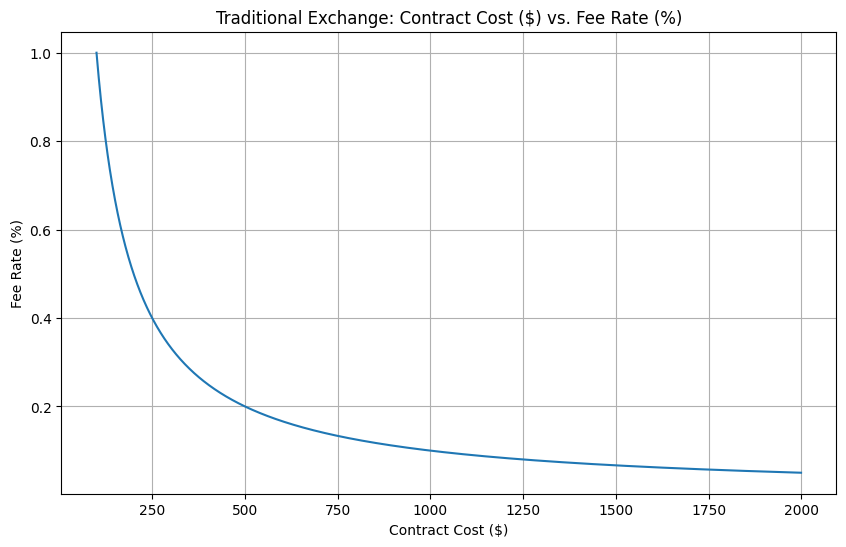

In [11]:
contract_sizes = [i for i in range(100, 2000)]
r = [100/i for i in contract_sizes]

# plot contract sizes vs. r
plt.figure(figsize=(10, 6))
plt.plot(contract_sizes, r)
plt.title('Traditional Exchange: Contract Cost ($) vs. Fee Rate (%)')
plt.xlabel('Contract Cost ($)')
plt.ylabel('Fee Rate (%)')
plt.grid()
# save figure
plt.savefig('contract_cost_vs_fee_rate.png', dpi=300)

In [3]:
buyer_cost = 92869.0
creator_cost = 3834100.0 + 395194.0

In [4]:
gas_prices = pd.read_csv('export-AvgGasPrice.csv')
# convert gas prices to float
gas_prices['Value (Wei)'] = gas_prices['Value (Wei)'].astype(float)
# convert to ether
gas_prices['Value (Ether)'] = gas_prices['Value (Wei)'] / 1e18
# convert to USD
gas_prices['Value (USD)'] = gas_prices['Value (Ether)'] * 1230.0

# calculate mean gas price
mean_gas_price = gas_prices['Value (USD)'].mean()

# calculate standard deviation of gas price
std_gas_price = gas_prices['Value (USD)'].std()

# calculate 1 standard deviation above the mean
mean_plus_std = mean_gas_price + std_gas_price

# calculate 2 standard deviations above the mean in gwei
mean_plus_2std = mean_gas_price + 2 * std_gas_price

# calculate 3 standard deviations above the mean in gwei
mean_plus_3std = mean_gas_price + 3 * std_gas_price

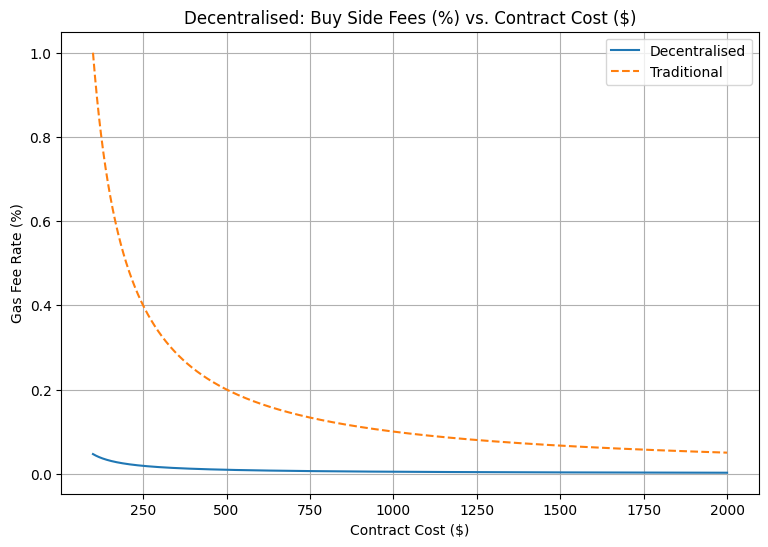

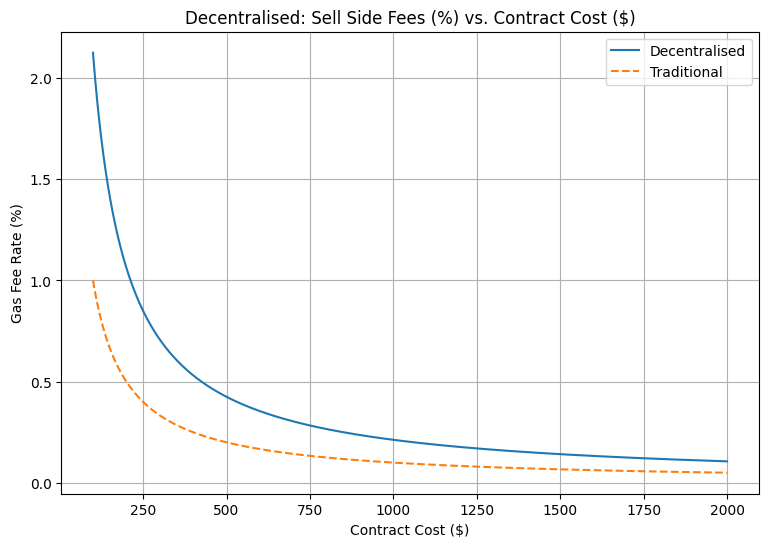

In [5]:
# Plot gas fees for buyer and creator at each standard deviation
gas_fees = {
    'Mean': [buyer_cost * mean_gas_price, creator_cost * mean_gas_price],
    'Mean + 1 Std': [buyer_cost * mean_plus_std, creator_cost * mean_plus_std],
    'Mean + 2 Std': [buyer_cost * mean_plus_2std, creator_cost * mean_plus_2std],
    'Mean + 3 Std': [buyer_cost * mean_plus_3std, creator_cost * mean_plus_3std],
}


contract_sizes = [i for i in range(100, 2000)]

buyer_rates = {
    'Mean': [gas_fees['Mean'][0]/i for i in contract_sizes],
    'Mean + 1 Std': [gas_fees['Mean + 1 Std'][0]*100/i for i in contract_sizes],
    'Mean + 2 Std': [gas_fees['Mean + 2 Std'][0]*100/i for i in contract_sizes],
    'Mean + 3 Std': [gas_fees['Mean + 3 Std'][0]*100/i for i in contract_sizes],
}

creator_rates = {
    'Mean': [gas_fees['Mean'][1]/i for i in contract_sizes],
    'Mean + 1 Std': [gas_fees['Mean + 1 Std'][1]*100/i for i in contract_sizes],
    'Mean + 2 Std': [gas_fees['Mean + 2 Std'][1]*100/i for i in contract_sizes],
    'Mean + 3 Std': [gas_fees['Mean + 3 Std'][1]*100/i for i in contract_sizes],
}

# Plot buyer graph 
plt.figure(figsize=(9, 6))
plt.plot(contract_sizes, buyer_rates['Mean'], label='Decentralised')
#plt.plot(contract_sizes, buyer_rates['Mean + 1 Std'], label='Mean + 1 Std')
#plt.plot(contract_sizes, buyer_rates['Mean + 2 Std'], label='Mean + 2 Std')
#plt.plot(contract_sizes, buyer_rates['Mean + 3 Std'], label='Mean + 3 Std')
plt.plot(contract_sizes, r, label='Traditional', linestyle='--')
plt.title('Decentralised: Buy Side Fees (%) vs. Contract Cost ($)')
plt.xlabel('Contract Cost ($)')
plt.ylabel('Gas Fee Rate (%)')
plt.legend()
plt.grid()
# save figure
plt.savefig('buyer_gas_fees_vs_contract_cost.png', dpi=300)

# Plot creator graph
plt.figure(figsize=(9, 6))
plt.plot(contract_sizes, creator_rates['Mean'], label='Decentralised')
#plt.plot(contract_sizes, creator_rates['Mean + 1 Std'], label='Mean + 1 Std')
#plt.plot(contract_sizes, creator_rates['Mean + 2 Std'], label='Mean + 2 Std')
#plt.plot(contract_sizes, creator_rates['Mean + 3 Std'], label='Mean + 3 Std')
plt.plot(contract_sizes, r, label='Traditional', linestyle='--')
plt.title('Decentralised: Sell Side Fees (%) vs. Contract Cost ($)')
plt.xlabel('Contract Cost ($)')
plt.ylabel('Gas Fee Rate (%)')
plt.legend()
plt.grid()
# save figure
plt.savefig('creator_gas_fees_vs_contract_cost.png', dpi=300)

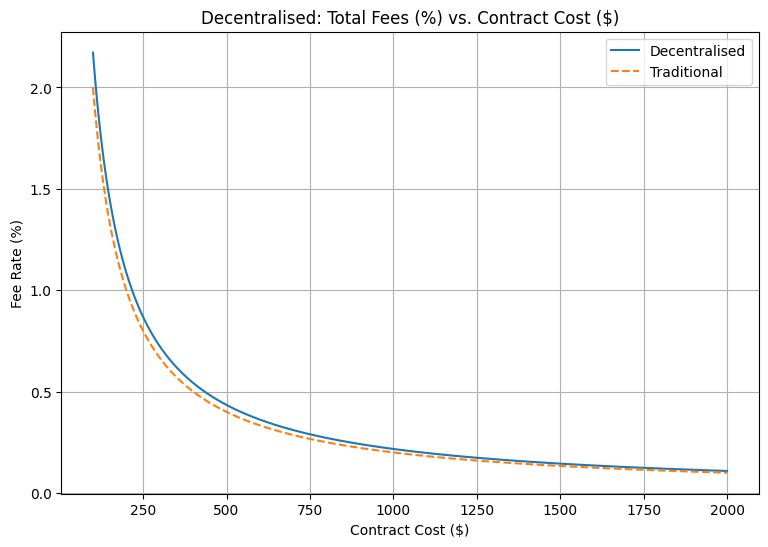

In [6]:
two_r = [2*i for i in r]
creator_plus_buyer_rate = [buyer_rates['Mean'][i] + creator_rates['Mean'][i] for i in range(len(buyer_rates['Mean']))]

# plot total costs graph
plt.figure(figsize=(9, 6))
plt.plot(contract_sizes, creator_plus_buyer_rate, label='Decentralised')
plt.plot(contract_sizes, two_r, label='Traditional', linestyle='--')
plt.title('Decentralised: Total Fees (%) vs. Contract Cost ($)')
plt.xlabel('Contract Cost ($)')
plt.ylabel('Fee Rate (%)')
plt.legend()
plt.grid()
# save figure
plt.savefig('total_gas_fees_vs_contract_cost.png', dpi=300)


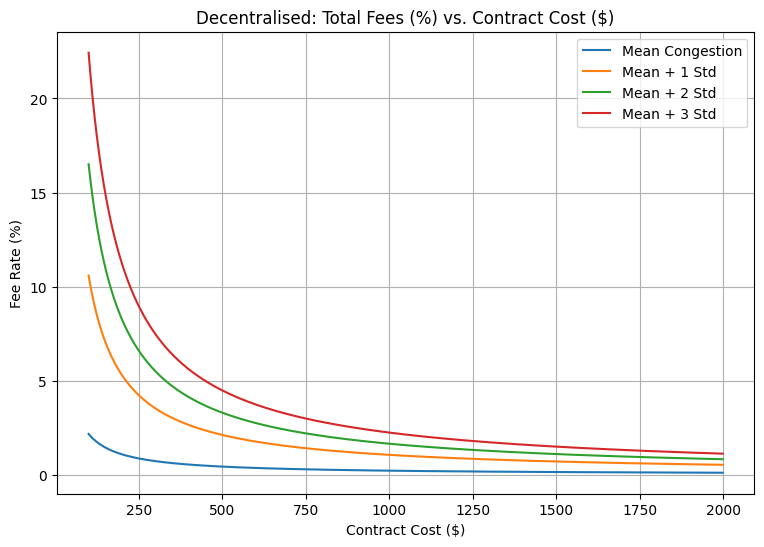

In [7]:
# Plot total fees at each standard deviation
plt.figure(figsize=(9, 6))
plt.plot(contract_sizes, creator_plus_buyer_rate, label='Mean Congestion')
plt.plot(contract_sizes, buyer_rates['Mean + 1 Std'], label='Mean + 1 Std')
plt.plot(contract_sizes, buyer_rates['Mean + 2 Std'], label='Mean + 2 Std')
plt.plot(contract_sizes, buyer_rates['Mean + 3 Std'], label='Mean + 3 Std')
plt.title('Decentralised: Total Fees (%) vs. Contract Cost ($)')
plt.xlabel('Contract Cost ($)')
plt.ylabel('Fee Rate (%)')
plt.legend()
plt.grid()
# save figure
plt.savefig('total_gas_fees_vs_contract_cost_std.png', dpi=300)
